# Esercizio 10: Simulated Annealing

Il simulated annealing è un algoritmo di ottimizzazione che sfrutta l'analogia del problema in considerazione con un sistema termodinamico che viene raffreddato lentamente. 
Alla base c'è l'interpretazione della funzione di costo $L(\{x\})$, dove $\{x\}$ è la nostra configurazione, con l'energia di un sistema meccanico statistico con distribuzione di probabilità di Boltzmann
$$
p(\{x\})=\frac{e^{-\beta L(\{x\})}}{Z}
$$

L'idea è quella di eseguire $n$ passi per ogni $beta=\frac{1}{T}$, partendo da temperature alte (bassi valori di $beta$) fino ad arrivare a temperatura nulla, o quasi (alti valori di beta), cambiando poco alla volta la temperatura e facendo un numero di passi sufficiente a far si che il sistema raggiunga l'equilibrio termodinamico, di modo che esso raggiunga la configurazione di minima energia.

Ad ogni passo viene proposta una nuova configurazione $\{x'\}$ che viene accettata con probabilità

$$
p= \begin{cases}  e^{-\beta( L(\{x'\})-L(\{x\})}& \mbox{if }  L(\{x'\})> L(\{x\}) \\ 1& \mbox{altrimenti}
\end{cases}
$$


Per testare l'algoritmo propongo 4 diversi andamenti di $\beta=f(n^{\beta}_{passi})$:
- lineare (spezzata)
- quadratico
- cubico
- esponenziale

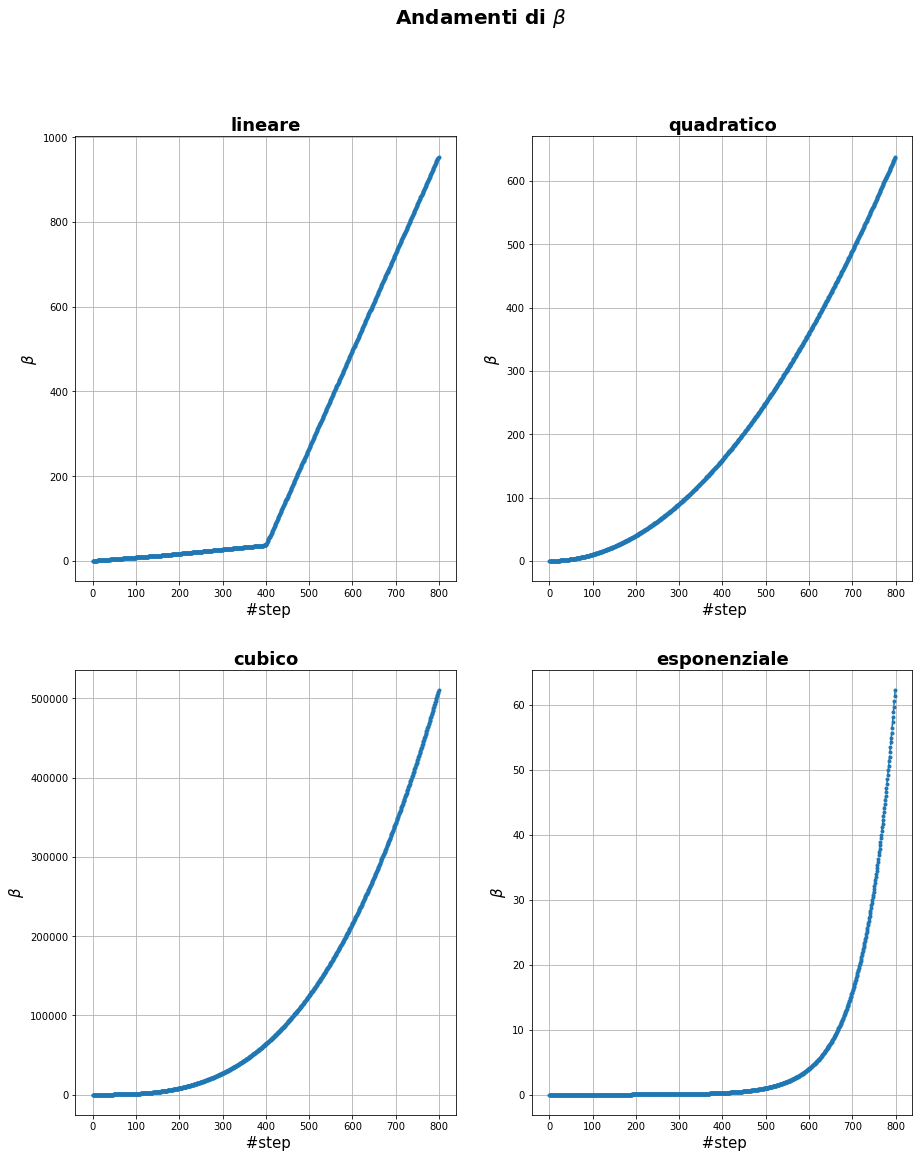

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

file=open('output/output.L_circleA.dat')
beta_A, step_A, L_A=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleB.dat')
beta_B, step_B, L_B=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleC.dat')
beta_C, step_C, L_C=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleD.dat')
beta_D, step_D, L_D=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)


steps=[step_A,step_B,step_C,step_D]
betas=[beta_A,beta_B,beta_C,beta_D]
titles=['lineare', 'quadratico', 'cubico', 'esponenziale']

fig, axes=plt.subplots(2, 2, figsize=(15,18))
plt.suptitle(r"Andamenti di $\beta$", fontsize=20, fontweight='bold')
k=0
for i in range(2):
    for j in range(2):
        ax=axes[i][j]
        k
        ax.plot(steps[k],betas[k], '.--')
        ax.set_title(titles[k], fontsize=18, fontweight='bold')
        ax.set_ylabel(r"$\beta$",fontsize=15)
        ax.set_xlabel(r" #step",fontsize=15)
        ax.grid(True)
        k+=1
    


#ax[2].plot(step_B,beta_B, '.--', label="quadratic")
#ax[2].plot(step_C,beta_C, '.--', label="cubic")
#ax[2].plot(step_D,beta_D, '.--', label="exponential")

I coefficienti numerici per i vari andamenti sono stati scelti in modo da far si che la temperatura non decrescesse troppo velocemente all'inizio, cioè quell'intervallo dove il sistema è più sensibile a bruschi cambi di temperatura

L'algoritmo viene utilizzato per trovare il percorso più breve per collegare $N_{city}=32$ città (punti), distribuiti casualmente su una circonferenza e all'interno di un quadrato.

In questo caso usiamo $N_{passi}=200$ per ogni valore di $\beta$, con $\beta$ che parte da $\beta_0=0.001$ e arriva a $f(n_{final})$ con $n_{final}=800$.

# Circonferenza

In [ ]:
file=open('output/output.circle_pos.dat')
xc,yc=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('output/output.order_circleA.dat')
ordercA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleB.dat')
ordercB=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleC.dat')
ordercC=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleD.dat')
ordercD=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")


fig, ax=plt.subplots(nrows=4, ncols=3, figsize=(15,18))
ax[0][0].plot(xc,yc, '.')
ax[0][0].set_title("point on a circumference")
ax[0][1].plot(xc,yc, '.-')
ax[0][1].set_title("casual connection")
ax[0][2].plot(xc[ordercA-1],yc[ordercA-1], '.-')
ax[0][2].set_title("connection after alghoritm (LINEAR)")
ax[1][0].plot(xc,yc, '.')
ax[1][0].set_title("point on a circumference")
ax[1][1].plot(xc,yc, '.-')
ax[1][1].set_title("casual connection")
ax[1][2].plot(xc[ordercB-1],yc[ordercB-1], '.-')
ax[1][2].set_title("connection after alghoritm (QUADRATIC)")
ax[2][0].plot(xc,yc, '.')
ax[2][0].set_title("point on a circumference")
ax[2][1].plot(xc,yc, '.-')
ax[2][1].set_title("casual connection")
ax[2][2].plot(xc[ordercC-1],yc[ordercC-1], '.-')
ax[2][2].set_title("connection after alghoritm (CUBIC)")
ax[3][0].plot(xc,yc, '.')
ax[3][0].set_title("point on a circumference")
ax[3][1].plot(xc,yc, '.-')
ax[3][1].set_title("casual connection")
ax[3][2].plot(xc[ordercD-1],yc[ordercD-1], '.-')
ax[3][2].set_title("connection after alghoritm (EXPONENTIAL)")
plt.show()

In [5]:
file=open('output/output.L_circleA.dat')
beta_A, step_A, L_A=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleB.dat')
beta_B, step_B, L_B=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleC.dat')
beta_C, step_C, L_C=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_circleD.dat')
beta_D, step_D, L_D=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(step_A,L_A, '.--', label="linear")
ax[0].plot(step_B,L_B, '.--', label="quadratic")
ax[0].plot(step_C,L_C, '.--', label="cubic")
ax[0].plot(step_D,L_D, '.--', label="exponential")
ax[0].set_title("fitness")
ax[0].set_xlabel(r"$step$")
ax[0].set_ylabel(r"$L$")
ax[0].legend()

ax[1].plot(beta_A,L_A, '.--', label="linear")
ax[1].plot(beta_B,L_B, '.--', label="quadratic")
ax[1].plot(beta_C,L_C, '.--', label="cubic")
ax[1].plot(beta_D,L_D, '.--', label="exponential")
ax[1].set_title("fitness")
ax[1].set_xlabel(r"$\beta$")
ax[1].set_ylabel(r"$L$")
ax[1].set_xlim(-10,300)
ax[1].legend()

plt.show()

print("Final fitness linear=", L_A[-1])
print("Final fitness quardatic=", L_B[-1])
print("Final fitness cubic=", L_C[-1])
print("Final fitness exponential=", L_D[-1])

FileNotFoundError: [Errno 2] No such file or directory: 'output.L_circleA.dat'

Si osserva come per tutti gli andamenti di $\beta$ l'algoritmo riesce a trovare il percorso migliore, cioè quello che minimizza la funzione di costo $L\{x\}$

### Genetic vs Annealing

In [ ]:
file=open('output/output.circle_pos.dat')
xc,yc=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('output/output.order_circleA.dat')
ordercA_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleB.dat')
ordercB_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleC.dat')
ordercC_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_circleD.dat')
ordercD_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('../lab9/order_circle.dat')
orderc_GA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")


fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(14,12))

ax[0][0].plot(xc[ordercA_SA-1],yc[ordercA_SA-1], '.--', label="SA")
ax[0][0].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[0][0].set_title("SA (linear) vs GA")
ax[0][0].legend()
ax[1][0].plot(xc[ordercB_SA-1],yc[ordercB_SA-1], '.--',label="SA")
ax[1][0].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[1][0].set_title("SA (quadratic) vs GA")
ax[1][0].legend()

ax[0][1].plot(xc[ordercC_SA-1],yc[ordercC_SA-1], '.--',label="SA")
ax[0][1].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[0][1].set_title("SA (cubic) vs GA")
ax[0][1].legend()

ax[1][1].plot(xc[ordercD_SA-1],yc[ordercD_SA-1], '.--',label="SA")
ax[1][1].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[1][1].set_title("SA (exponential) vs GA")
ax[1][1].legend()
plt.show()

Si nota come nel caso della circonferenza gli algoritmi di simulated annealing e quello genetico riproducano gli stessi risultati

------------------

===================================================================================================

------------------------------

# Quadrato

In [ ]:
file=open('output/output.square_pos.dat')
xc,yc=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('output/output.order_squareA.dat')
ordercA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareB.dat')
ordercB=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareC.dat')
ordercC=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareD.dat')
ordercD=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")



fig, ax=plt.subplots(nrows=4, ncols=3, figsize=(15,18))
ax[0][0].plot(xc,yc, '.')
ax[0][0].set_title("point on a circumference")
ax[0][1].plot(xc,yc, '.-')
ax[0][1].set_title("casual connection")
ax[0][2].plot(xc[ordercA-1],yc[ordercA-1], '.-')
ax[0][2].set_title("connection after alghoritm (LINEAR)")
ax[1][0].plot(xc,yc, '.')
ax[1][0].set_title("point on a circumference")
ax[1][1].plot(xc,yc, '.-')
ax[1][1].set_title("casual connection")
ax[1][2].plot(xc[ordercB-1],yc[ordercB-1], '.-')
ax[1][2].set_title("connection after alghoritm (QUADRATIC)")
ax[2][0].plot(xc,yc, '.')
ax[2][0].set_title("point on a circumference")
ax[2][1].plot(xc,yc, '.-')
ax[2][1].set_title("casual connection")
ax[2][2].plot(xc[ordercC-1],yc[ordercC-1], '.-')
ax[2][2].set_title("connection after alghoritm (CUBIC)")
ax[3][0].plot(xc,yc, '.')
ax[3][0].set_title("point on a circumference")
ax[3][1].plot(xc,yc, '.-')
ax[3][1].set_title("casual connection")
ax[3][2].plot(xc[ordercD-1],yc[ordercD-1], '.-')
ax[3][2].set_title("connection after alghoritm (EXPONENTIAL)")
plt.show()

L'algoritmo funziona bene nel senso che in tutte le dipendenze funzionali di $beta$, viene raggiunta una configurazione ottimale (non ci sono intersezioni). Non essendo una disposizione semplice come quella della circonferenza e non avendo un tempo infinito di esecuzione dell'algoritmo le configurazioni raggiunte sono, in alcuni casi, diverse tra loro.

In [ ]:
file=open('output/output.L_squareA.dat')
beta_A, step_A, L_A=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_squareB.dat')
beta_B, step_B, L_B=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_squareC.dat')
beta_C, step_C, L_C=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)
file=open('output/output.L_squareD.dat')
beta_D, step_D, L_D=np.loadtxt(file, delimiter=",", usecols=[0,1, 2], unpack=True)



fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax[0].plot(step_A,L_A, '.--', label="linear")
ax[0].plot(step_B,L_B, '.--', label="quadratic")
ax[0].plot(step_C,L_C, '.--', label="cubic")
ax[0].plot(step_D,L_D, '.--', label="exponential")
ax[0].set_title("fitness")
ax[0].set_xlabel(r"$step$")
ax[0].set_ylabel(r"$L$")
ax[0].legend()
ax[1].plot(beta_A,L_A, '.--', label="linear")
ax[1].plot(beta_B,L_B, '.--', label="quadratic")
ax[1].plot(beta_C,L_C, '.--', label="cubic")
ax[1].plot(beta_D,L_D, '.--', label="exponential")
ax[1].set_title("fitness")
ax[1].set_xlabel(r"$\beta$")
ax[1].set_ylabel(r"$L$")
ax[1].legend()

plt.show()

print("Final fitness linear=", L_A[len(L_A)-1])
print("Final fitness quardatic=", L_B[len(L_B)-1])
print("Final fitness 3=", L_C[len(L_C)-1])
print("Final fitness exponential=", L_D[len(L_D)-1])

### Genetic vs Annealing

In [ ]:
file=open('output/output.square_pos.dat')
xc,yc=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

file=open('output/output.order_squareA.dat')
ordercA_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareB.dat')
ordercB_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareC.dat')
ordercC_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('output/output.order_squareD.dat')
ordercD_SA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")
file=open('../lab9/order_square.dat')
orderc_GA=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True, dtype="int")


fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(14,10))

ax[0][0].plot(xc[ordercA_SA-1],yc[ordercA_SA-1], '.--', label="SA")
ax[0][0].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[0][0].set_title("SA (linear) vs GA")
ax[0][0].legend()
ax[1][0].plot(xc[ordercB_SA-1],yc[ordercB_SA-1], '.--',label="SA")
ax[1][0].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[1][0].set_title("SA (quadratic) vs GA")
ax[1][0].legend()

ax[0][1].plot(xc[ordercC_SA-1],yc[ordercC_SA-1], '.--',label="SA")
ax[0][1].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[0][1].set_title("SA (cubic) vs GA")
ax[0][1].legend()

ax[1][1].plot(xc[ordercD_SA-1],yc[ordercD_SA-1], '.--',label="SA")
ax[1][1].plot(xc[orderc_GA-1],yc[orderc_GA-1], '.-.',label="GA")
ax[1][1].set_title("SA (exponential) vs GA")
ax[1][1].legend()

plt.show()

Come detto sopra l'algoritmo funziona bene e in alcuni casi riesce a trovare configurazioni più ottimali che nel caso dell'algoritmo genetico, la cui funzione di costo finale era di $L_{genetic}=6.2668$

## MPI

come modificarlo?

- commentare e spiegare teoria
- provare a fare più passi montecarlo per ogni temperatura
- MPI
